In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
# DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"
DATASET_PATH = 'pilot.csv'

## Загрузка и обзор данных

### Загрузка

In [10]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)
df.columns = [i.replace(" ", "_").lower() for i in df.columns]
start_len = len(df)

# удаление satisfaction = '-'
print("До удаления satisfaction == '-':\t", df.shape[0])
df.dropna(inplace=True)
df = df[df['satisfaction'] != '-']
print("После удаления satisfaction == '-':\t", df.shape[0])

До удаления satisfaction == '-':	 129880
После удаления satisfaction == '-':	 102085


### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

## Препроцессинг оценок (5 бальная шкала)

,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure/arrival_time_convenient,inflight_wifi_service
count,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000
mean,2.760915,2.982191,3.204584,3.255062,3.443454,3.361326,3.386874,3.357212,3.635794,3.308547,3.645305,3.289269,3.065142,2.733281
std,1.422714,1.308681,1.352929,1.386338,1.345700,1.356854,1.335507,1.366766,1.222298,1.302760,1.212639,1.341797,1.554720,1.358823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,45.000000,36.000000,45.000000,40.000000,45.000000,40.000000,45.000000,40.000000,40.000000,45.000000,36.000000,45.000000,45.000000,45.000000


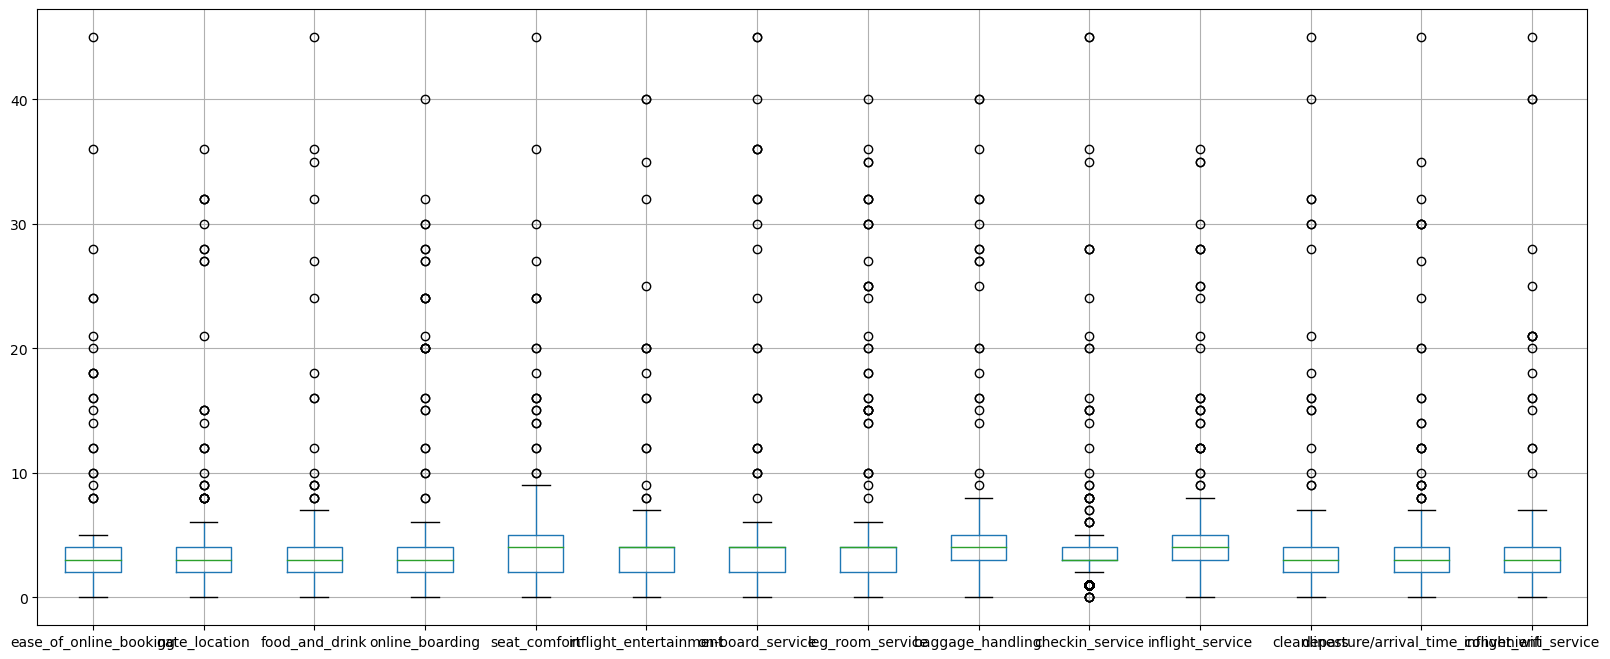

In [52]:
col_points = ['ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 
                      'inflight_entertainment', 'on-board_service', 'leg_room_service','baggage_handling', 
                      'checkin_service', 'inflight_service','cleanliness', 'departure/arrival_time_convenient',
                      'inflight_wifi_service']
df_point = df[col_points]
#df[col_points].hist(figsize=(20,8), layout=(-1,4), bins=10);
df_point.boxplot(column=col_points, figsize=(20,8));
df_point.describe()


Видим, что 75% всегда лежат на 4, очень малое количество процентов выборок лежит выше. Следовательно шкала 5бальная.

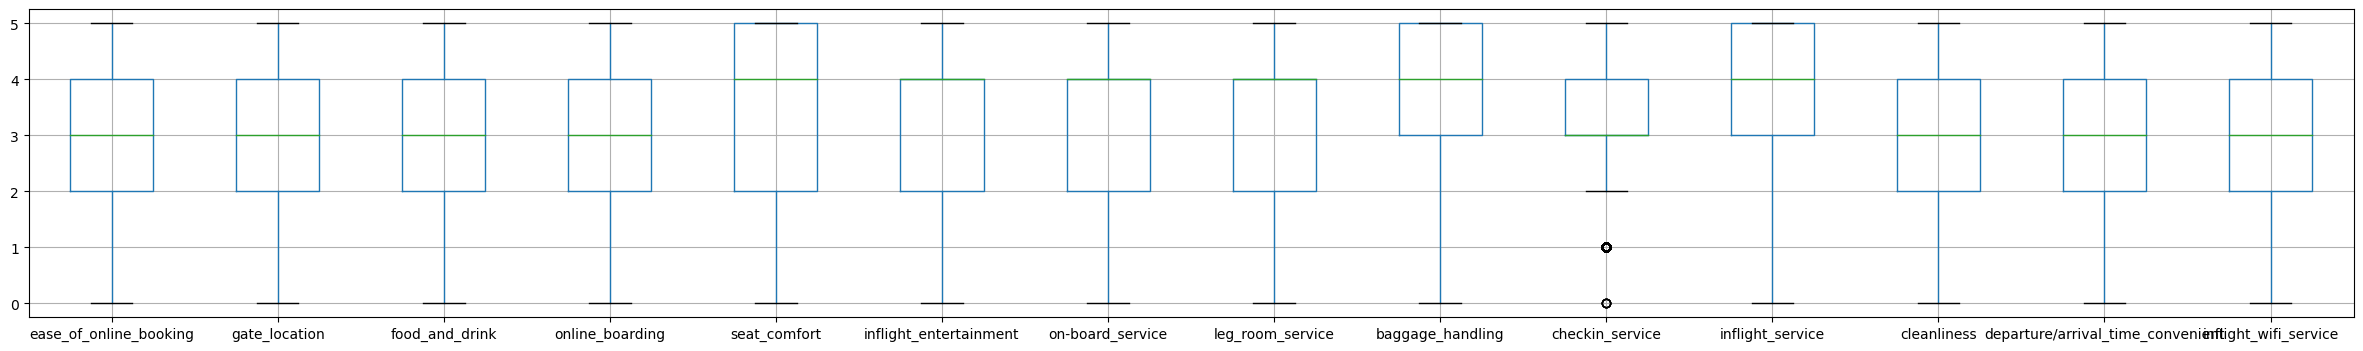

In [53]:
def to_5_points (df_x, list_columns):
    for i in list_columns:
        df_x = df_x.dropna()
        df_x.loc[:, i] = df_x.loc[:, i].apply(lambda x: int(x) if x <= 5 else int(round(x/10)))
    return df_x
df_point = to_5_points(df_point, col_points)
df_point.describe()
df_point.boxplot(column=col_points, figsize=(30,4));

## Препроцессинг float переменных (age, distance и два delay)

### Обработка age

In [70]:
col_float = ['age', 'flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes']
df_float = df[col_float]

age
flight_distance
arrival_delay_in_minutes
departure_delay_in_minutes


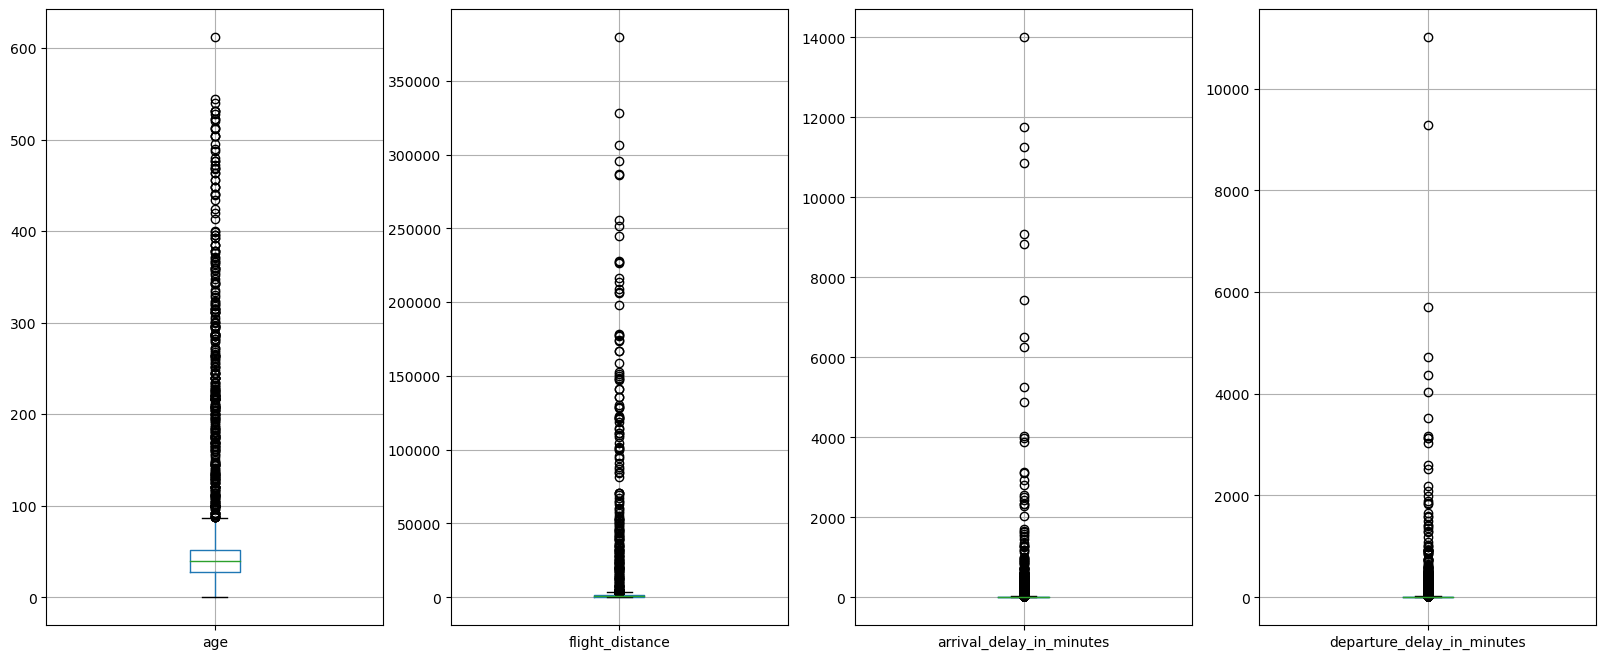

In [71]:
# вывод boxplot
lens = len(df_float.columns)
plt.figure(figsize=(20,8))
for col_x, num_graph in zip(df_float.columns, range(lens)):
    plt.subplot(1,lens,  num_graph+1)
    print(col_x)
    df_float[[col_x]].boxplot()

<AxesSubplot:>

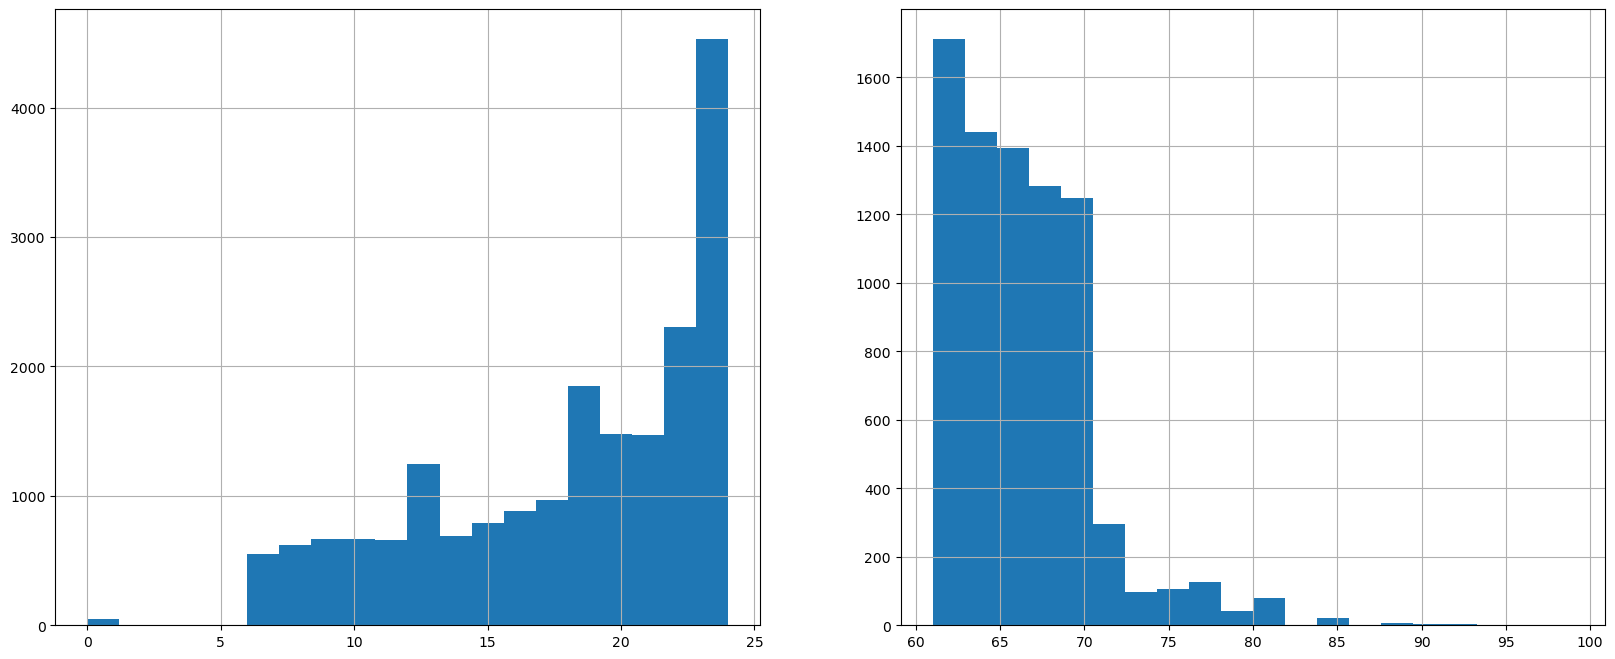

In [72]:
# обрабатываем возраст
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df_float[(df_float['age']<25)]['age'].hist(bins=20)
plt.subplot(1,2,2)
df_float[(df_float['age']<100) & (df_float['age'] > 60)]['age'].hist(bins=20)

Граница по возрасту разумная от 7 лет (0 - выбросы) до 70 лет.
Разумно предположить, что значения больше 70 это дробные значения возраста, которые неверно перевели в целые.

In [75]:
def prep_age(x):
    if x >=7 and x <= 70: return x
    else:
        return round(x/10)
    
df_float = df_float[df_float['age'] >= 7]
df_float['age'] = df_float['age'].apply(prep_age)

### Обработка flying_distance

<AxesSubplot:>

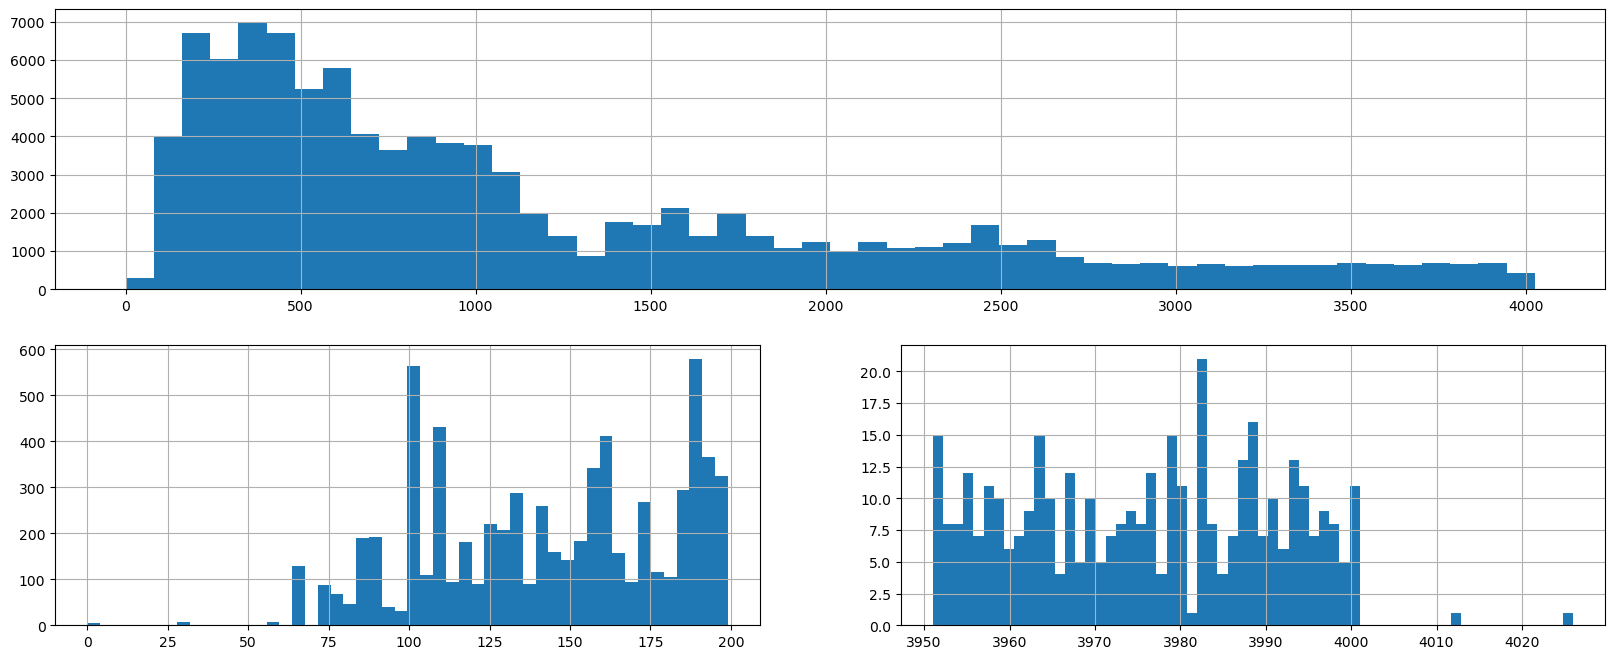

In [110]:
# обработка расстояния (distance)
# стоит учесть, что расстояние указано в милях и значение 25 000 - это кругосветное путешествие.
# следовательно, все, что выше 25 000 - нужно делить на 1000, предполагая, что значения указаны в миллиМилях
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
df_float[(df_float['flight_distance']< 4200)]['flight_distance'].hist(bins=50)
plt.subplot(2,2,3)
df_float[(df_float['flight_distance']< 200)]['flight_distance'].hist(bins=50)
plt.subplot(2,2,4)
df_float[(df_float['flight_distance']< 4200) & (df_float['flight_distance'] > 3950)]['flight_distance'].hist(bins=63)

Видим, что минимум можно оставить (редко катаются на короткие дистанции)

Cверху жесткая граница при привышении 4000 миль. Будто выше 4000 данные либо не собирались (и это выбросы), либо это некорректные введенные данные (данные собирались только сперелетов до 4000 миль, а эти были введены некорректно).

In [111]:
def fly_preproc(x):
    if x > 4000: return round(x/1000)
    return x
df_float['flight_distance'] = df_float['flight_distance'].apply(fly_preproc)

<AxesSubplot:>

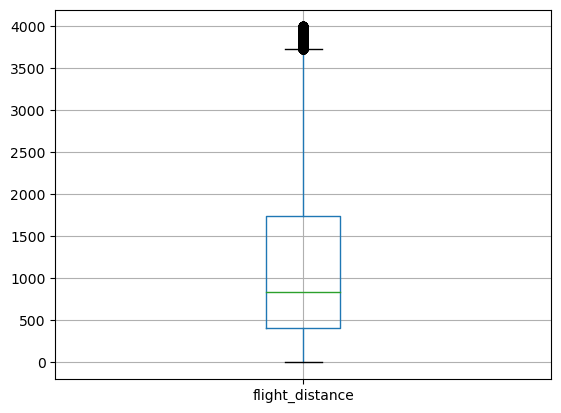

In [113]:
df_float[['flight_distance']].boxplot()

In [42]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)
df.columns = [i.replace(" ", "_").lower() for i in df.columns]
start_len = len(df)

# удаление satisfaction = '-'
print("До удаления satisfaction == '-':\t", df.shape[0])
df.dropna(inplace=True)
df = df[df['satisfaction'] != '-']
print("После удаления satisfaction == '-':\t", df.shape[0])


# перед обработкой применим данные преобразования
col_points = ['ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 
                      'inflight_entertainment', 'on-board_service', 'leg_room_service','baggage_handling', 
                      'checkin_service', 'inflight_service','cleanliness', 'departure/arrival_time_convenient',
                      'inflight_wifi_service']


def to_5_points (df_x, list_columns):
    for i in list_columns:
        df_x = df_x.dropna()
        df_x.loc[:, i] = df_x.loc[:, i].apply(lambda x: int(x) if x <= 5 else int(round(x/10)))
    return df_x

def prep_age(x):
    if x >=7 and x <= 70: return int(x)
    else:
        return int(round(x/10))

def fly_preproc(x):
    if x > 4000: return int(round(x/1000))
    return int(x)

df = to_5_points(df, col_points)

df = df[df['age'] >= 7]
df['age'] = df['age'].apply(prep_age)
df['flight_distance'] = df['flight_distance'].apply(fly_preproc)

df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['type_of_travel'] = df['type_of_travel'].map({'Business travel':1,  'Personal Travel': 0})
df['customer_type'] = df['customer_type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df['class'] = df['class'].map({'Business': 2,'Eco Plus': 1, 'Eco': 0})

# удаление столбцов id и delay
df.drop(['id', 'arrival_delay_in_minutes', 'departure_delay_in_minutes'], axis=1, inplace=True)

До удаления satisfaction == '-':	 129880
После удаления satisfaction == '-':	 102085


### Обработка arrival и department delay

In [6]:
df_bad = df[(df['satisfaction'] == 'neutral or dissatisfied') ]['arrival_delay_in_minutes']
df_good = df[(df['satisfaction'] == 'satisfied') ]['arrival_delay_in_minutes']
df_3 = df['arrival_delay_in_minutes']
pd.concat([df_bad, df_good, df_3], axis=1).describe()

,arrival_delay_in_minutes,arrival_delay_in_minutes,arrival_delay_in_minutes
count,57802.000000,44237.000000,102039.000000
mean,18.739179,14.236996,16.787346
std,106.821737,113.430756,109.757966
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,17.000000,8.000000,13.000000
max,11760.000000,14006.000000,14006.000000


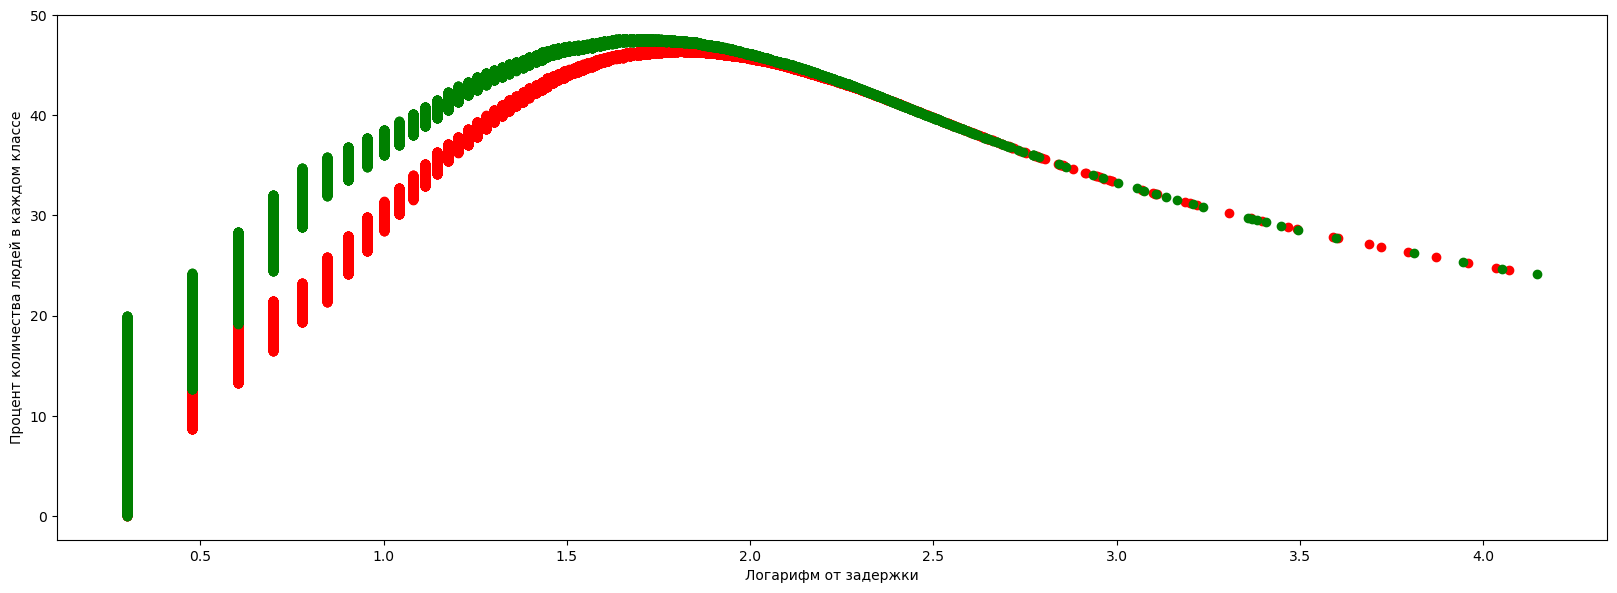

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
# при убирании нулей
df_bad = df_bad[~df_bad.isin([0])]
df_good = df_good[~df_good.isin([0])]

x_bad = np.array(list(map(math.log10, df_bad.sort_values().values+1)))#/27615*20000    # нормировка и приведение к единицам
x_good = np.array(list(map(math.log10, df_good.sort_values().values+1)))#/17137*20000  # нормировка и приведение к единицам
y_bad = np.arange(27615)/276.15
y_good = np.arange(17137)/171.37
plt.scatter(x_bad, y_bad/x_bad, c='red')
plt.scatter(x_good, y_good/x_good, c='green');

# С НУЛЯМИ
#plt.plot(np.array(list(map(math.log10, df_bad.sort_values().values+1)))/57802, np.arange(57802)/578.02, c='red')
#plt.plot(np.array(list(map(math.log10, df_good.sort_values().values+1)))/44237, np.arange(44237)/442.37, c='green');

# без логарифмирования - ужасно
# plt.plot(np.array(list(map(math.log10, df_bad.sort_values().values+1)))/57802, np.arange(57802)/578.02, c='red')
# plt.plot(np.array(list(map(math.log10, df_good.sort_values().values+1)))/44237, np.arange(44237)/442.37, c='green');

plt.ylabel("Процент количества людей в каждом классе")
plt.xlabel("Логарифм от задержки");


## ДА ЭТО ЖЕ ФКУНКЦИЯ ВЕРОЯТНОСТИ!!! Надо взять от нее производную

C:\Users\lev\AppData\Local\Temp\ipykernel_9104\3134368053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['arrival_delay_in_minutes'] = np.array(list(map(math.log10, df_1['arrival_delay_in_minutes']+1)))
C:\Users\lev\AppData\Local\Temp\ipykernel_9104\3134368053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['departure_delay_in_minutes'] = np.array(list(map(math.log10, df_1['departure_delay_in_minutes']+1)))


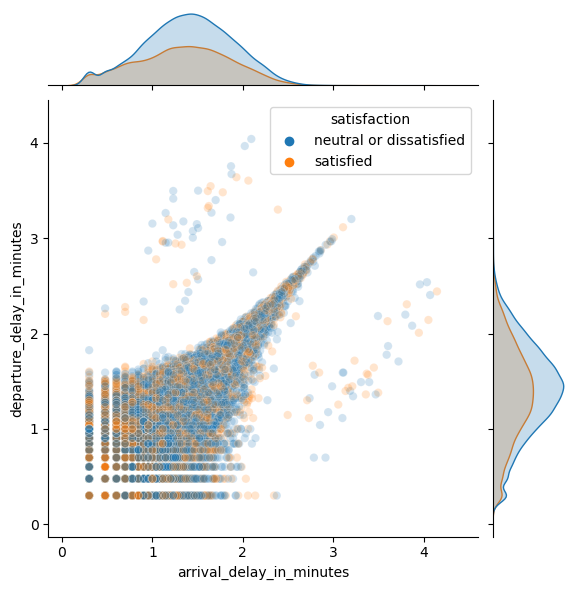

In [214]:
df_1 = df[(df['arrival_delay_in_minutes'] != 0) & df['departure_delay_in_minutes'] != 0]
df_1['arrival_delay_in_minutes'] = np.array(list(map(math.log10, df_1['arrival_delay_in_minutes']+1)))
df_1['departure_delay_in_minutes'] = np.array(list(map(math.log10, df_1['departure_delay_in_minutes']+1)))

sns.jointplot(x='arrival_delay_in_minutes', y='departure_delay_in_minutes', data=df_1, hue='satisfaction', alpha=0.2)

Видим, что у довольных пассажиров

In [43]:
df.sample(10)

,gender,age,customer_type,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
102643,0,65,0,1,2,365,4,4,4,3,...,2,2,3,2,5,5,2,4,2,1
98823,1,25,0,1,0,763,3,3,3,3,...,3,4,4,1,1,3,2,3,4,0
94387,0,38,0,1,2,248,2,2,2,3,...,2,4,4,3,4,4,3,5,4,0
108736,0,46,1,1,2,404,5,5,1,5,...,5,5,5,5,4,5,3,5,3,1
13441,0,38,0,1,0,491,2,4,1,4,...,1,3,3,1,3,3,3,3,3,0
57138,0,44,1,1,2,1222,1,1,1,1,...,4,5,4,4,5,4,4,4,5,1
6966,1,34,1,1,2,3604,2,2,4,2,...,5,5,4,4,4,4,5,4,5,1
10776,1,23,1,1,2,3873,4,3,3,3,...,4,4,4,3,1,3,2,3,4,0
5418,1,19,1,1,2,1787,2,5,5,5,...,2,2,2,4,2,4,3,3,2,0
36964,0,30,1,1,2,899,3,3,4,3,...,5,5,5,3,2,2,3,5,5,1


In [44]:
df.to_csv('prep_pilot_6.07.csv', index=False)